In [ ]:
طبقه بندی سه کلاس تصاویر سگ وگربه وپاندا با ماشین بردار پشتیبان

In [54]:
import cv2
import numpy as np

In [55]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [56]:
from sklearn import svm
import os
from tensorflow.keras.utils import img_to_array

In [61]:
def resized(image):
        return cv2.resize(image,(32,32),interpolation=cv2.INTER_AREA)

In [58]:

def image_to_arrayed(image):
        # apply the Keras utility function that correctly rearranges
        # the dimensions of the image
        return img_to_array(image)

In [73]:
from imutils import paths
preprocessors=[]
labels_dict = {'cats':0, 'dogs':1, 'panda':2}
def load_image(imagePaths,preprocessors=None,verbose=-1):
        imagePaths=list(paths.list_images(imagePaths))
        data=[]
        labels=[]
        for (i,imagePath) in enumerate(imagePaths):
            #imagePath:/dataset_name/class/image.jpg
            image=cv2.imread(imagePath)
            label=imagePath.split(os.path.sep)[-2]  
            if preprocessors is not None:
                for p in preprocessors:
                    image=p(image)
            
            data.append(image)
            labels.append(labels_dict[label]) 
            
            if verbose>0 and i>0 and (i+1)%verbose==0:
                print('[INFO] processed {}/{}'.format(i+1,len(imagePaths)))
        return (np.array(data),np.array(labels)) 
              

In [78]:
(data, labels) = load_image('dataset/animals',preprocessors=[resized,image_to_arrayed] ,verbose=500)


[INFO] processed 500/3000
[INFO] processed 1000/3000
[INFO] processed 1500/3000
[INFO] processed 2000/3000
[INFO] processed 2500/3000
[INFO] processed 3000/3000


In [79]:
image_data = np.array(data, dtype='float32')/255.0
labels = np.array(labels)

print(image_data.shape, labels.shape)

(3000, 32, 32, 3) (3000,)


In [83]:
## Data conversion for One vs One classification

M = data.shape[0]
data = data.reshape(M,-1)
print(data.shape)
print(labels.shape)

(3000, 3072)
(3000,)


In [84]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.25, random_state=42)



In [85]:
svm_classifier = svm.SVC(kernel='linear', C=1.0)
svm_classifier.fit(trainX, trainY)
ypred_sklearn = svm_classifier.predict(testX)
svm_classifier.score(testX,testY)

0.5293333333333333

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
cnf_matrix_sklearn = confusion_matrix(testY, ypred_sklearn)
print(cnf_matrix_sklearn)

[[148  91  23]
 [110 103  36]
 [ 52  41 146]]


In [89]:
"""Use this method directly - """
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[148  91  23]
 [110 103  36]
 [ 52  41 146]]


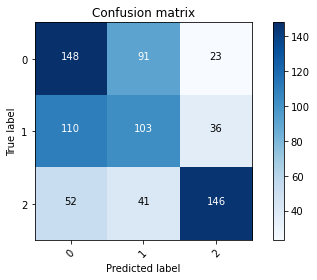

In [90]:
plot_confusion_matrix(cnf_matrix_sklearn, [0,1,2],normalize=False,title='Confusion matrix',cmap=plt.cm.Blues)


In [96]:
dic_ker={'linear':'linear', 'poly':'poly', 'rbf':'rbf', 'sigmoid':'sigmoid'}
for k in dic_ker:
    svm_classifier = svm.SVC(kernel=dic_ker.get(k), C=1.0)
    svm_classifier.fit(trainX, trainY)
    ypred_sklearn = svm_classifier.predict(testX)
    print('kernel {}='.format(k),svm_classifier.score(testX,testY))

kernel linear= 0.5293333333333333
kernel poly= 0.5946666666666667
kernel rbf= 0.62
kernel sigmoid= 0.3253333333333333
